In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from guitarsounds import Sound


In [2]:
def all_example_sounds():
    """
    Load all example sounds from the guitarsounds project
    """
    all_sounds = []
    root1 = '/Users/olivier/projects/guitarsounds/example_sounds/Wood_Guitar'
    root2 = '/Users/olivier/projects/guitarsounds/example_sounds/Carbon_Guitar'
    for root in (root1, root2):
        for sfile in np.sort(os.listdir(root)):
            sound = Sound(os.path.join(root, sfile))
            sound.ref_file = os.path.join(root, sfile)
            all_sounds.append(sound)
    return all_sounds
        
def fname2note(fname):
    """
    infer note fundamental from filename
    str :-> str
    """
    ref_note_dict = {'E6':'E2 (82 Hz)',
                     'A5':'A2 (110 Hz)',
                     'D4':'D3 (147 Hz)',
                     'G3':'G3 (196 Hz)',
                     'B2':'B3 (247 Hz)',
                     'E1':'E4 (330 Hz)'}
    fname_note = fname.split('.')[0].split('_')[-1]
    return ref_note_dict[fname_note]
    

In [3]:
all_sounds = all_example_sounds()


# Better envelop algorithm

In [ ]:
sound = all_sounds[0]
sound.signal = sound.signal.trim_time(4)

In [19]:
guess_tresh

0.0013072314661304084

In [24]:
np.nonzero(sound.signal.time() > 0.05)[0][0]
sound.signal.time()[np.nonzero(sound.signal.time() > 0.05)[0][0]]

0.050023242893910365

In [27]:
sig_data[idx_onset_max]

0.002680994807484895

In [28]:
guess_tresh

0.002612462932260817

In [43]:
sound.signal.sr

22050

In [46]:
window

201.03218645948948

(0.0, 0.5)

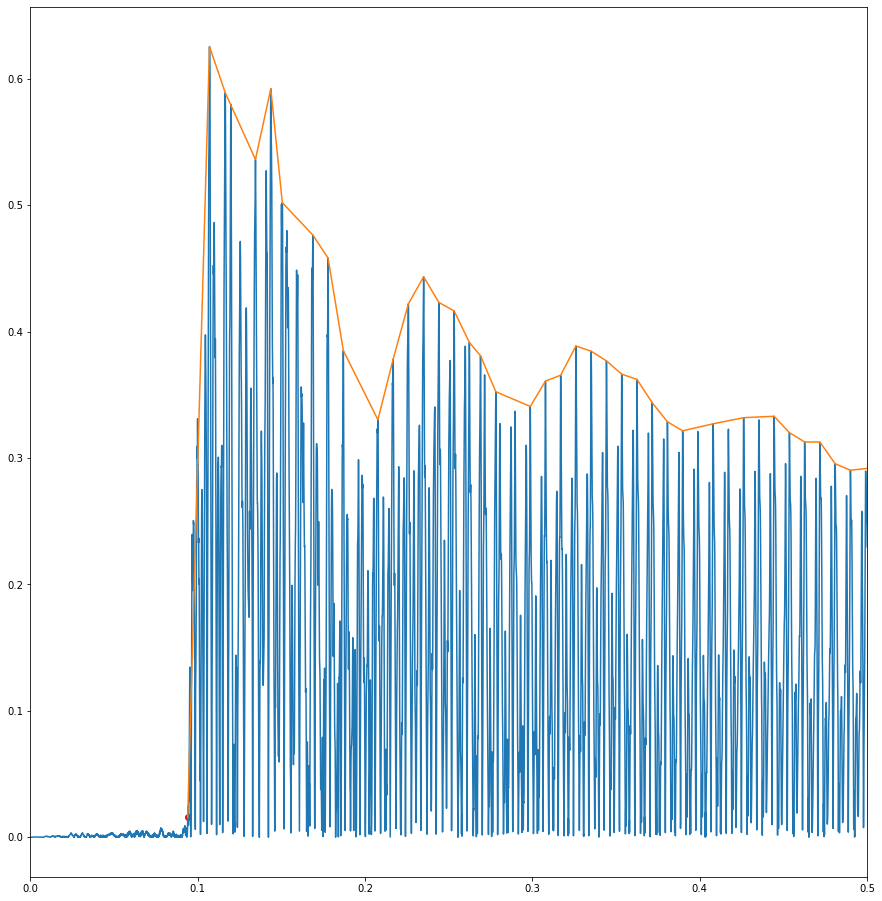

In [55]:
fig, ax = plt.subplots(figsize=(15,16))
sig_data = np.abs(sound.signal.signal)

onset_data = sig_data.copy()[:np.argmax(sig_data)]
guess_tresh = np.mean(sig_data[np.nonzero(sound.signal.time() > 0.05)[0][0]])*10
idx_onset = np.nonzero(sig_data > guess_tresh)[0][0]

Period = 1/sound.fundamental
window = int(Period*sound.signal.sr)*2
step = window // 2
envelop_points = [sig_data[idx_onset]]
envelop_idxs = [idx_onset]
current_idx = idx_onset
while True:
    envelop_points.append(np.max(sig_data[current_idx:current_idx+window]))
    envelop_idxs.append(current_idx + np.argmax(sig_data[current_idx:current_idx+window]))
    current_idx += step
    if current_idx > len(sig_data):
        break
    
plt.plot(sound.signal.time(), sig_data)
plt.plot(sound.signal.time()[envelop_idxs], envelop_points)
plt.scatter(sound.signal.time()[idx_onset], sig_data[idx_onset], color='r')

ax = plt.gca()
ax.set_xlim(0, 0.5)
#ax.set_ylim(0, 0.3)

# Logarithmic envelop test

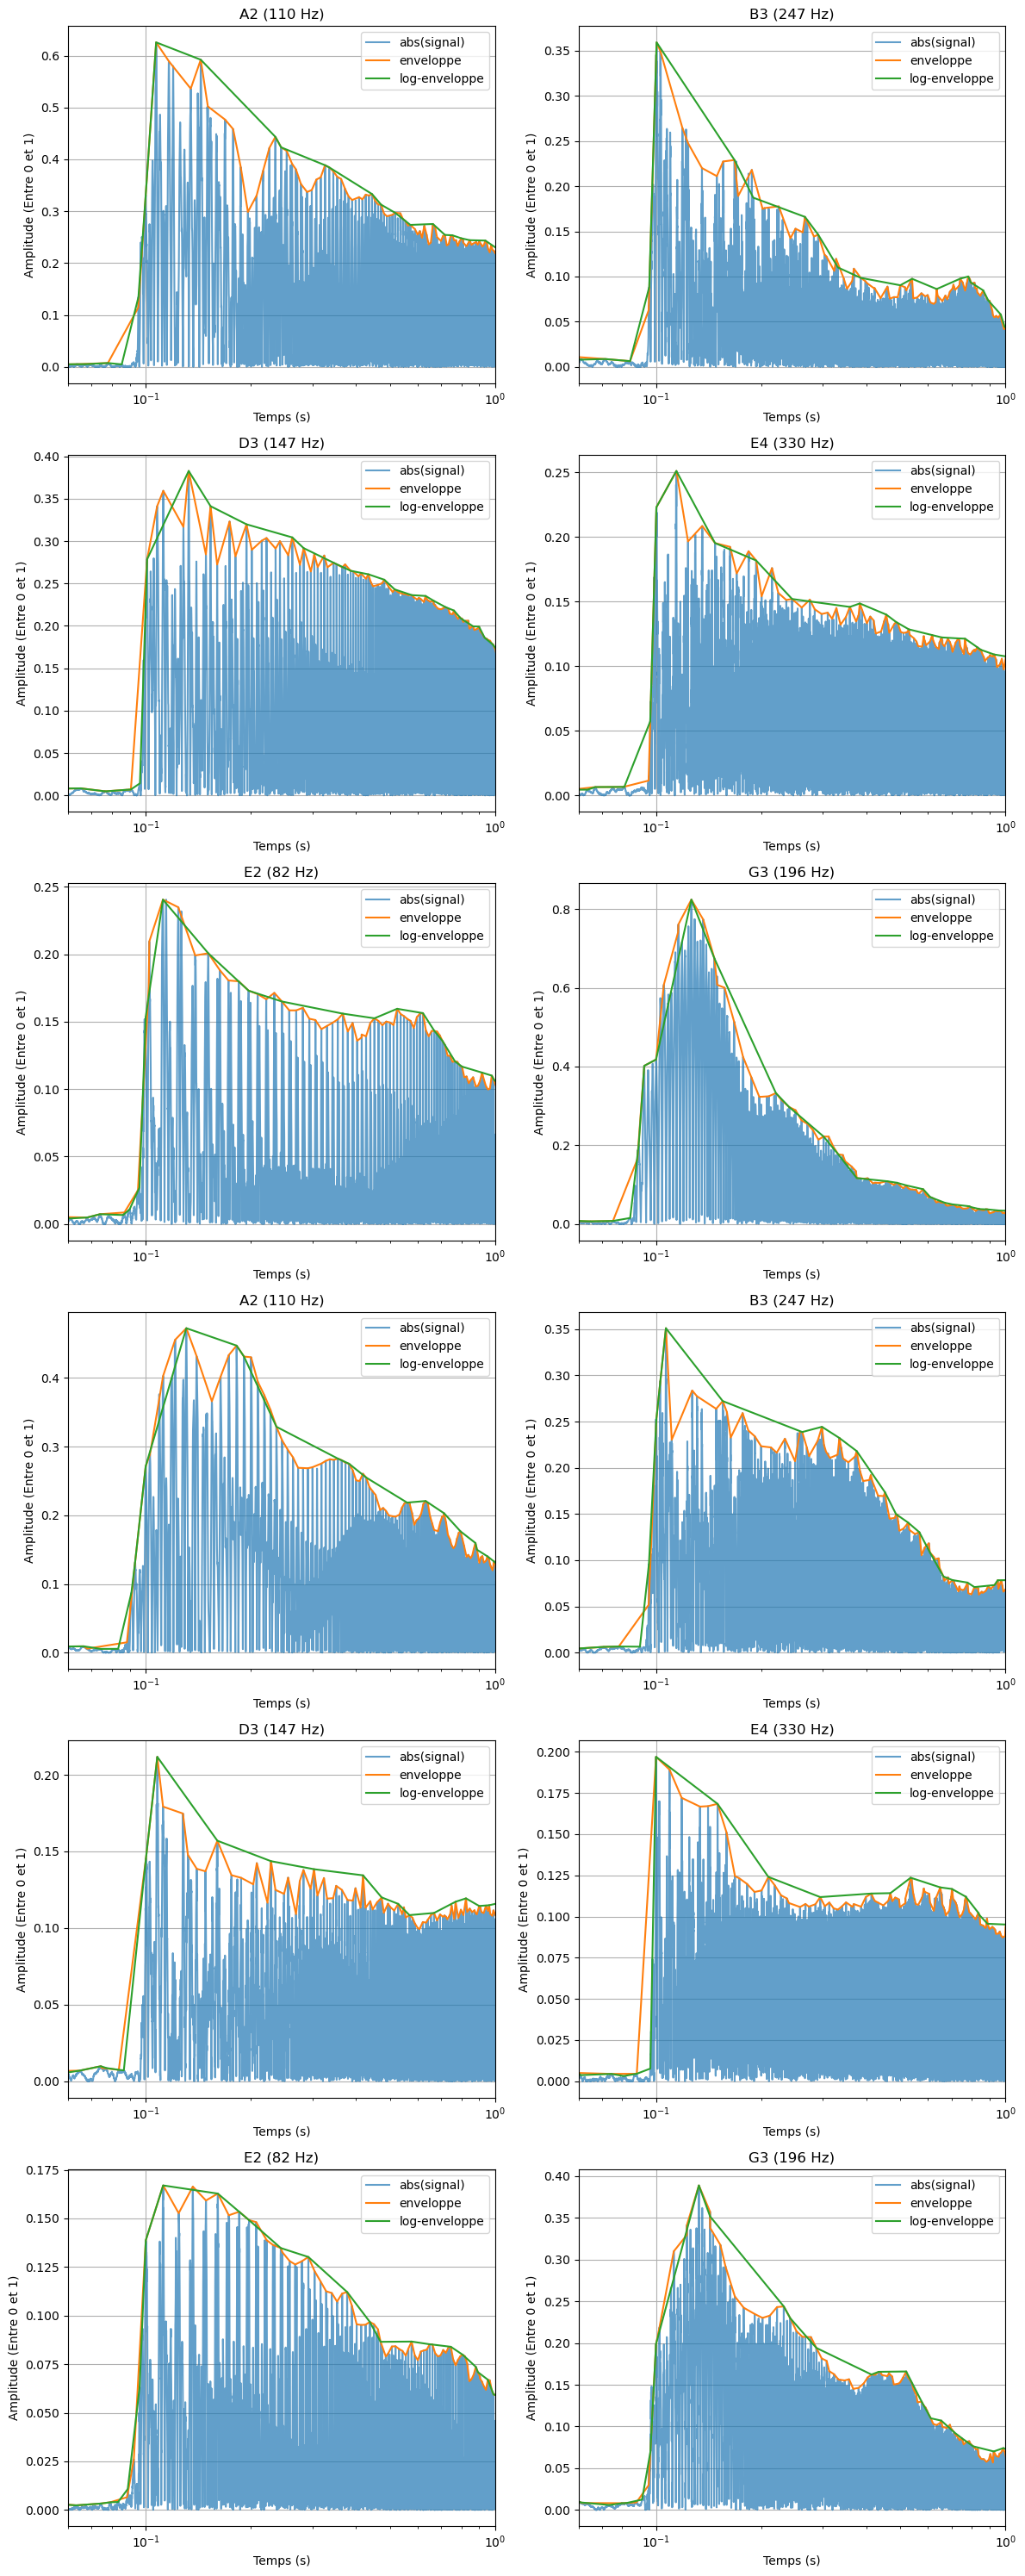

In [27]:
fig, axs = plt.subplots(len(all_sounds)//2, 2, figsize=(12, 2.5*len(all_sounds)))

for s, ax in zip(all_sounds, axs.flatten()):
    plt.sca(ax)
    plt.plot(s.signal.time(), 
             np.abs(s.signal.signal),
             label='abs(signal)',
             alpha=0.7)
    s.signal.plot.envelope(label='enveloppe')
    s.signal.plot.log_envelope(label='log-enveloppe')
    ax.set_xlim(0.06, 1)
    ax.legend()
    ax.set_title(fname2note(s.ref_file))
plt.tight_layout()

In [28]:
fig.savefig('test_env_vs_signal')

# Figure pour l'aide aux utilisateurs

In [33]:
sound.trim_signal(4.)

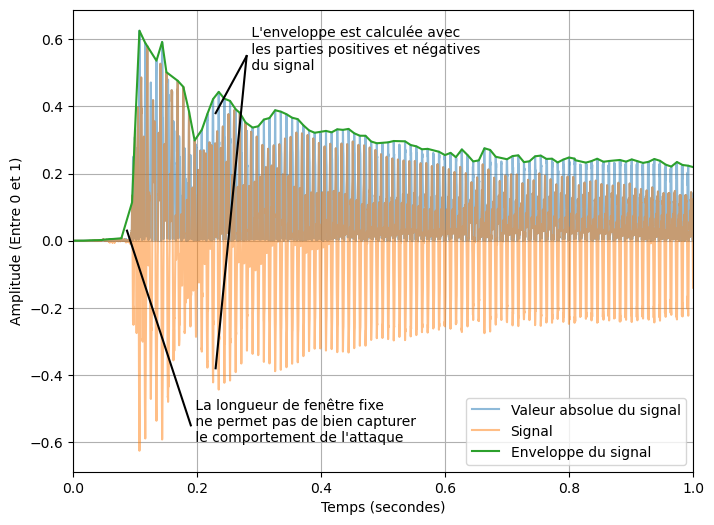

In [72]:
# Envelope
fig, ax = plt.subplots(figsize=(8, 6))
sound = all_sounds[0]


plt.plot(sound.signal.time(), 
         np.abs(sound.signal.signal),
         alpha=0.5,
         label='Valeur absolue du signal')


plt.plot(sound.signal.time(), 
         sound.signal.signal,
         alpha=0.5,
         label='Signal')


sound.signal.plot.envelope(label='Enveloppe du signal')
ax = plt.gca()
ax.set_xlim(0., 1)
ax.set_xlabel('Temps (secondes)')
ax.legend(loc='lower right')
ax.annotate(" L'enveloppe est calculée avec \n les parties positives et négatives \n du signal", (0.28, 0.51))
plt.plot((0.23, 0.28), (0.38, 0.55), color='k')
plt.plot((0.23, 0.28), (-0.38, 0.55), color='k')

ax.annotate(" La longueur de fenêtre fixe \n ne permet pas de bien capturer \n le comportement de l'attaque", (0.19, -0.6))
plt.plot((0.087, 0.19), (0.03, -0.55), color='k')

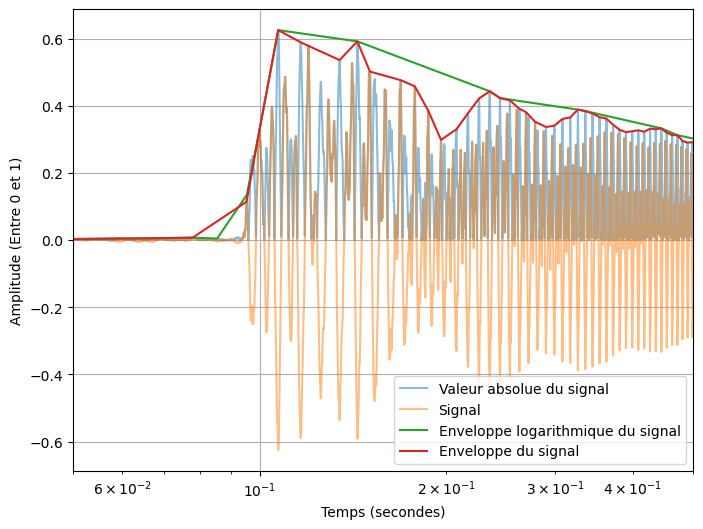

In [79]:
# Log-envelope
fig, ax = plt.subplots(figsize=(8, 6))
sound = all_sounds[0]


plt.plot(sound.signal.time(), 
         np.abs(sound.signal.signal),
         alpha=0.5,
         label='Valeur absolue du signal')


plt.plot(sound.signal.time(), 
         sound.signal.signal,
         alpha=0.5,
         label='Signal')


sound.signal.plot.log_envelope(label='Enveloppe logarithmique du signal')
sound.signal.plot.envelope(label='Enveloppe du signal')

ax = plt.gca()
ax.set_xlim(0.05, 0.5)
ax.set_xlabel('Temps (secondes)')
ax.legend(loc='lower right')

#ax.annotate(" L'enveloppe est calculée avec \n les parties positives et négatives \n du signal", (0.28, 0.51))
#plt.plot((0.23, 0.28), (0.38, 0.55), color='k')
#plt.plot((0.23, 0.28), (-0.38, 0.55), color='k')
#ax.annotate(" La longueur de fenêtre fixe \n ne permet pas de bien capturer \n le comportement de l'attaque", (0.19, -0.6))
#plt.plot((0.087, 0.19), (0.03, -0.55), color='k')